Mileage Prediction - Regression Analysis

Source:

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. carname: string(unique for each instance)

Import Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Import data

In [5]:
df = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv")

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

Data Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
df.corr

<bound method DataFrame.corr of       mpg  cylinders  displacement  horsepower  weight  acceleration   
0    18.0          8         307.0       130.0    3504          12.0  \
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu

Remove missing values

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


Data Visualization

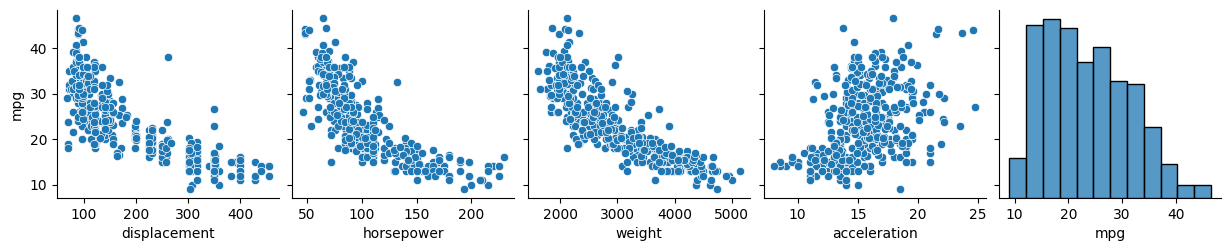

In [13]:
sns.pairplot(df, x_vars=['displacement','horsepower','weight','acceleration','mpg'], y_vars=['mpg']);

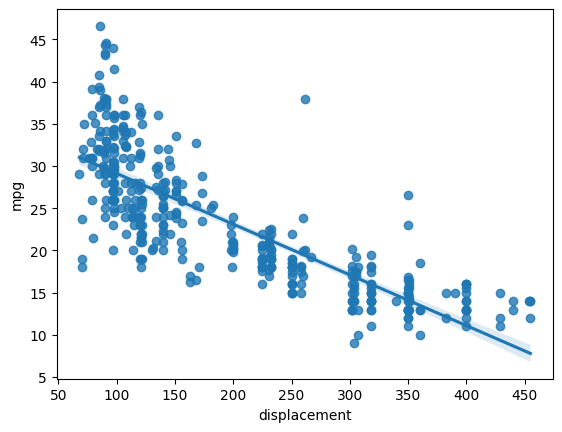

In [14]:
sns.regplot(x = 'displacement', y = 'mpg',data = df);

Define target variable y and Feature X

In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [16]:
y = df['mpg']

In [17]:
y.shape

(392,)

In [18]:
X = df[['displacement','horsepower','weight','acceleration']]

In [19]:
X.shape

(392, 4)

In [20]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


Scaling Data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss = StandardScaler()

In [23]:
X = ss.fit_transform(X)

In [24]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [25]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


After Standardization Mean is Zero and Standard Deviation is One

Train Test Split Data

In [26]:
from sklearn.model_selection import train_test_split 

In [27]:
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=2529)

In [29]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((294, 4), (98, 4), (294,), (98,))

Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
lr.intercept_

23.464404729340036

In [34]:
lr.coef_

array([-0.82134735, -2.00007128, -4.12715281, -0.16529152])

Milege = 23.46 - 0.8Displacement - 2Horsepower - 4.12Weight -0.165Acceleration + error

Predict Test Data  

In [35]:
y_pred = lr.predict(X_test)

In [36]:
y_pred

array([18.45029029, 15.11872575, 14.25951901, 23.63777162, 29.77227939,
       23.78289678, 26.46274613, 24.63477759, 15.10361067, 11.92089347,
       24.03667612, 28.03774179, 31.7791986 , 31.04942136, 18.34939414,
       19.34562679, 28.14901371, 32.26833498, 31.23336778, 27.1706607 ,
       18.90264044, 22.69158865, 26.30616149, 32.53334114, 20.7455229 ,
        8.43604922, 21.96939005, 18.16644283, 24.9187207 , 14.95041612,
       23.27573018, 17.10008397,  9.28416594, 30.02859334, 20.49341373,
       29.16402497, 24.1851619 , 21.82468561, 10.45764414, 12.99758931,
       21.55287965, 19.9763373 ,  5.81701795, 17.83479167, 22.69872144,
       29.39987303, 13.2638446 , 25.84303202, 29.29886179, 22.44116443,
       22.30857618, 16.57432268, 24.06827363, 30.19019859, 10.04817173,
        9.3533171 , 28.14495274, 23.67665202, 20.07936568, 30.77322956,
       20.95405256, 26.72684739, 23.16157669, 14.10789682, 24.37223149,
       26.84731155, 15.26437637, 24.21355   , 30.81705563, 14.86

Model Accuacy

In [37]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [38]:
mean_absolute_error(y_test,y_pred)

3.2128193572784176

In [39]:
mean_absolute_percentage_error(y_test, y_pred)

0.14486145216628085

In [40]:
r2_score(y_test, y_pred)

0.7174961864188241

Polynomial Regression

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [43]:
X_train2 = poly.fit_transform(X_train)

In [44]:
X_test2 = poly.fit_transform(X_test)

In [45]:
lr.fit(X_train2,y_train)

LinearRegression()

In [46]:
lr.intercept_

21.295474126506168

In [47]:
lr.coef_

array([-2.78636354, -5.39053361, -1.15797282, -1.14970885,  1.35645181,
       -0.16432177, -0.03040911,  1.09523004, -0.67580641,  0.78299062])

In [48]:
y_pred_poly = lr.predict(X_test2)

Model Accuracy

In [49]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score

In [50]:
mean_absolute_error(y_test,y_pred_poly)

2.6281657513434173

In [51]:
mean_absolute_percentage_error(y_test, y_pred_poly)

0.11292169321652233

In [52]:
r2_score(y_test, y_pred_poly)

0.7705431136534492